# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')


# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

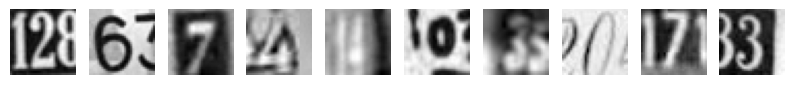

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data.**

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

print(X_train[0])
print(X_test[0])
# check whether the pixel values are between 0 to 1 after normalization

[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]


In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# One-hot encode output

#One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.
# it creates seperate column for each label. Here the labels are from 0-9 as we need to identify the digit.
# After encoding it creates 10 columns to represent 0-9


y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation='relu', input_shape=(1024, )))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

***What is a Dense Layer?***
In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks.

The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication. Matrix vector multiplication is a procedure where the row vector of the output from the preceding layers is equal to the column vector of the dense layer. The general rule of matrix-vector multiplication is that the row vector must have as many columns like the column vector.
**Ref -** https://analyticsindiamag.com/topics/what-is-dense-layer-in-neural-network/#:~:text=one%20by%20one.-,What%20is%20a%20Dense%20Layer%3F,in%20artificial%20neural%20network%20networks.



**What are Dense layers and when are they useful?**
Dense layers are used when association can exist among any feature to any other feature in data point. Since between two layers of size n1
 and n2
, there can n1∗n2
 connections and these are referred to as Dense.

**Where does Conv layers come in and when are they useful?**
Coming to the conv layers, these are important when nearby associations among the features matter, example object detection. Neighborhoods matter to classify or detect. It is very less likely that the pixels at the opposite corners(very far away) are somehow helpful in these use cases. Filters does this job of getting associations among neighborhoods. This answer is great at understanding difference between 1D and 2D convolutions. I really dont want to repeat it.

**Dropout and Flatten**
Dropout is a way of cutting too much association among features by dropping the weights (edges) at a probability. The original paper from Hinton et.al is a quick and great read to grasp it. Reducing associations can be applied among any layers which stops weight updation for the edge. The another key difference here is it has no weights associated with it. It is just there dropping things.

Flatten layers are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer. If you are familiar with numpy, it is equivalent to numpy.ravel. An output from flatten layers is passed to an MLP for classification or regression task you want to achieve. No weighting are associated with these too. It is just flattening the hell out.

**To improve the model**
Try more layers, change activation functions, try batching. If there is any chance of improving features and creating any higher order ones, do it. Too many variables to speculate.

This question is real broad, but hope I covered it well.

In [ ]:
# Build the model

model_1 = nn_model_1()

In [ ]:
# Print the summary

model_1.summary()
# We provided input as 1024 and we have one bias so the Param # would be (1024+1)*64 = 65600
# then input to this dense_1 is from dense, so the input is 64 and 1 bias, Param # would be (64+1)*32 = 2080
# next input is 32, so the param here is (32+1)*10 = 330


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
#https://keras.io/api/models/model_training_apis/

history_model_1 = model_1.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    verbose=1,
                    epochs=20)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 3s 10ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 3s 10ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 7ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoc

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

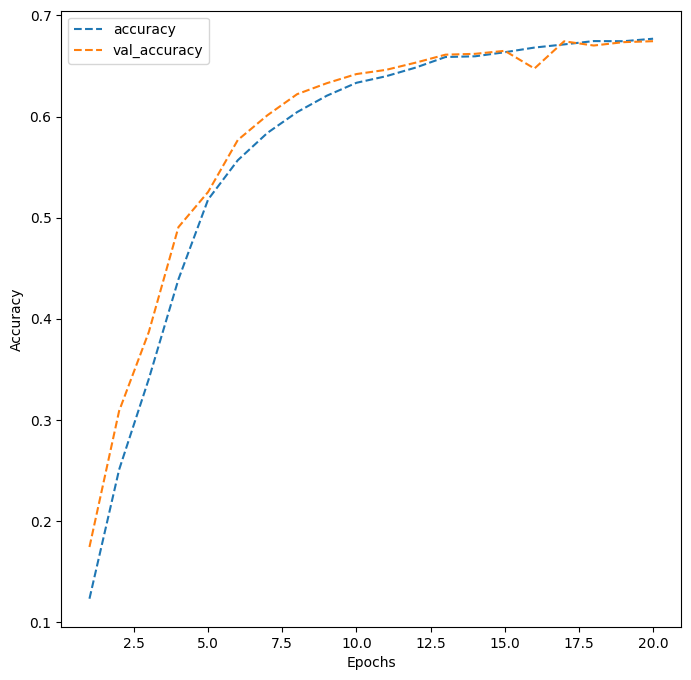

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**


**Final Epoch Metrics:** In the last epoch (20/20), the model achieved a training accuracy of 67.70% and a validation accuracy of 67.45%.

**Loss Values:** The training and validation losses were 1.0420 and 1.0535, respectively, indicating the average loss incurred by the model during training and validation.

**Consistency in Performance:** The training and validation accuracies are similar, suggesting the model generalizes well and does not exhibit significant overfitting or underfitting.

**Moderate Performance: **The achieved accuracies are moderate, indicating that the model performs reasonably well but may have room for improvement depending on the application requirements.

**Stable Training: **Throughout the epochs, there are no drastic fluctuations in performance, indicating stable training and convergence of the model.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture.**

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation='relu', input_shape=(1024, )))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.0005)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model


In [ ]:
# Build the model

model_2 = nn_model_2()

In [ ]:
# Print the model summary

model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# # Fit the model
history_model_2 =  model_2.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    verbose=1,
                    epochs=30)

Epoch 1/30
263/263 [==============================] - 7s 18ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 4s 13ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 5s 20ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 4s 15ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 3s 13ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.6543

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

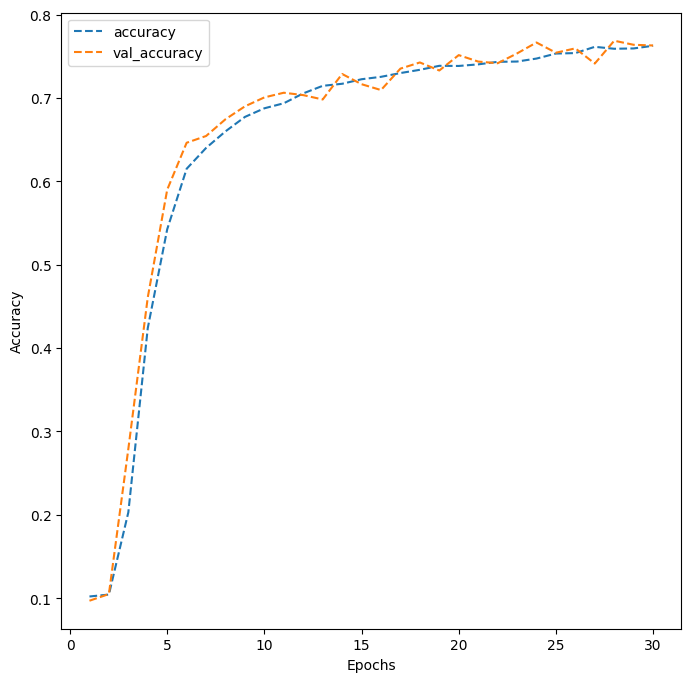

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

**Model 2 observations:**

**Epoch Details:** In the last epoch (30/30), the model achieved a training accuracy of 77.18% and a validation accuracy of 74.90%.

**Loss Values: **The training and validation losses were 0.7224 and 0.8329, respectively, indicating the average loss incurred by the model during training and validation.

**Consistent Performance:** Both training and validation accuracies are similar, indicating the model generalizes well to unseen data.

**Moderate Performance: **The achieved accuracies are moderate, suggesting the model performs reasonably well but may have room for improvement.

**Stable Training:** Throughout the epochs, there are no significant fluctuations in performance, indicating stable training and convergence of the model.

**Compare Model 1 to Model 2 with increased epochs:**

**Accuracy Improvement:** The model's accuracy increased significantly from 67.70% in Model1 to 77.18% in Model2 for training data and from 67.45% to 74.90% for validation data.

**Loss Reduction:** Both training and validation losses decreased from Model1 to Model2, indicating improved model performance in minimizing errors.

**Consistent Improvement:** Despite some degree of overfitting, the gap between training and validation accuracies reduced over epochs, suggesting improved generalization of the model.

**Stable Training:** Throughout the epochs, there were no major performance fluctuations, indicating stable training and convergence of the model.

**Optimization Opportunity:** While the model's performance improved, there's potential for further optimization to reduce overfitting and enhance generalization, possibly through techniques like regularization or adjusting model architecture.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 3s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



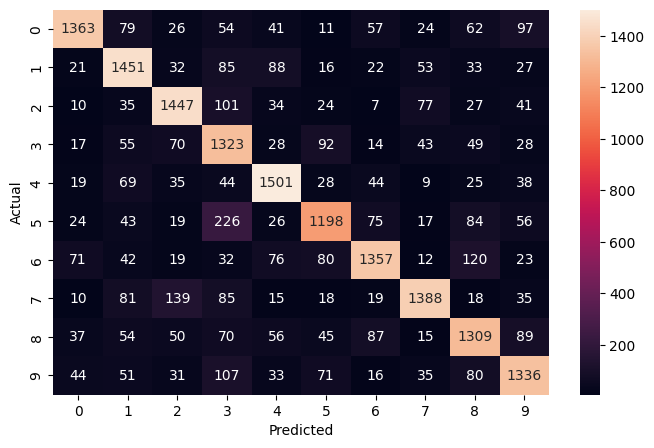

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**

**Overall Accuracy: **
The model achieves an overall accuracy of 74%, indicating a reasonable level of performance across all classes.

**Precision and Recall Variability:**

High precision for most classes (0, 3, 5, 9) indicates the model often correctly identifies positive instances for these classes.
High recall for classes 1, 4, 7 indicates the model successfully identifies a large proportion of actual instances for these classes, though it may produce more false positives.

**Class Performance:**

Balanced performance (precision and recall) is observed in classes 2, 6, and 8, indicating consistent identification of these classes.

**Areas for Improvement:**

Classes 1 and 3 have significant differences between precision and recall, suggesting the model could benefit from better balancing to reduce false positives (class 1) and false negatives (class 3).

**Generalization:**
The close alignment between macro and weighted average scores (all around 74%) suggests the model generalizes well, but overall performance can be enhanced by addressing the fluctuations and imbalances in precision and recall for certain classes.

## **Using Convolutional Neural Networks**

In [ ]:
import h5py
# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0
print(X_train[0])

[[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]


In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Write the function and appropriate variable name to one-hot encode the output

y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

# test labels

y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import datasets, layers, models
from keras.layers import Convolution2D

#Define the function
def cnn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )

    return model


In [ ]:
# Build the model

cnn_model_1 = cnn_model_1()

In [ ]:
# Print the model summary

cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# Fit the model

history_cnn_model_1 = cnn_model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 103s 97ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 98s 93ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 103s 98ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 100s 96ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 104s 99ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 98s 94ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 107s 102ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

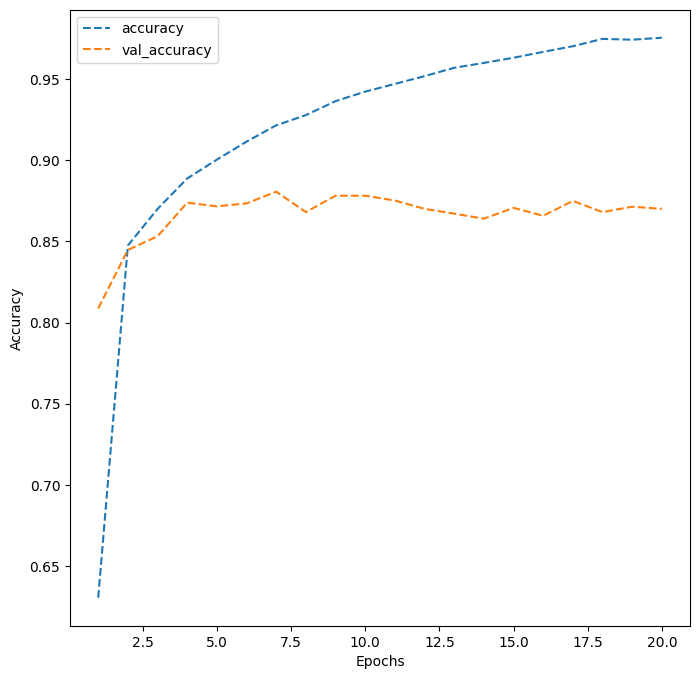

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Training Performance:**

The training loss decreases to 0.0742, indicating that the model's ability to minimize errors on the training data is improving.
The training accuracy reaches 97.56%, suggesting that the model is performing very well on the training data, achieving high accuracy.

**Validation Performance:**

The validation loss is higher at 0.8155 compared to the training loss, indicating that the model may be slightly overfitting or encountering difficulties in generalizing to unseen data.
The validation accuracy is 87.01%, which is lower than the training accuracy but still indicates good performance on unseen data.

**Training vs. Validation:**

There is a notable gap between the training and validation accuracies, suggesting that the model may be overfitting to some extent.

Overall, while the model achieves high accuracy on the training data, there seems to be room for improvement in generalization to unseen data, as indicated by the performance on the validation set and the noticeable gap between training and validation accuracies

In [ ]:
# Make prediction on the test data using model_1

test_pred1 = cnn_model_1.predict(X_test)

test_pred2 = np.argmax(test_pred1, axis = -1)
# Converting each entry to single label from one-hot encoded vector

y_test1 = np.argmax(y_test, axis = -1)
y_test2 = np.argmax(y_test_encoded, axis = -1)


563/563 [==============================] - 14s 26ms/step


In [ ]:
print(y_test)
print(y_test1)
print(test_pred1)
print(test_pred2)
print(y_test_encoded)
print(y_test2)

[1 7 2 ... 7 9 2]
3
[[1.65755642e-04 9.87061262e-01 5.35009662e-04 ... 7.22314280e-06
  2.72038905e-03 7.80307874e-03]
 [1.54644925e-11 8.52762923e-07 3.06005546e-07 ... 9.99998748e-01
  3.28278867e-14 1.14935346e-10]
 [2.51548287e-14 3.06634905e-14 9.99999940e-01 ... 3.37381634e-09
  1.72105399e-10 1.24208005e-11]
 ...
 [4.34962786e-12 1.69801293e-08 2.43762371e-11 ... 9.99999940e-01
  3.69671863e-11 1.39934050e-10]
 [2.11057682e-06 2.60518300e-06 5.53857035e-06 ... 1.39145584e-06
  2.66759336e-01 1.48973722e-05]
 [2.19622601e-11 1.78083486e-08 9.99993265e-01 ... 6.63626497e-06
  5.44999113e-09 4.36643033e-09]]
[1 7 2 ... 7 6 2]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
[1 7 2 ... 7 9 2]


In [ ]:
print(y_test2)
print(test_pred2)

[1 7 2 ... 7 9 2]
[1 7 2 ... 7 6 2]


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1814
           1       0.86      0.88      0.87      1828
           2       0.88      0.91      0.90      1803
           3       0.87      0.82      0.84      1719
           4       0.88      0.90      0.89      1812
           5       0.88      0.84      0.86      1768
           6       0.79      0.89      0.83      1832
           7       0.91      0.89      0.90      1808
           8       0.82      0.86      0.84      1812
           9       0.89      0.83      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



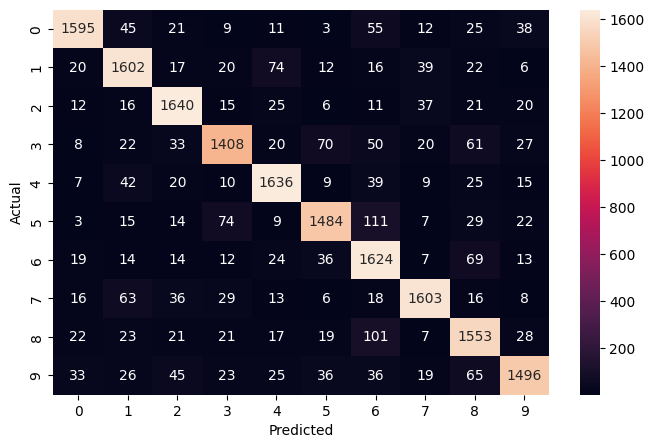

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2, test_pred2))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2, test_pred2)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations:__________**

**High Overall Accuracy:**
The model achieves an overall accuracy of 87%, indicating strong performance across all classes.

**Strong Performance for Most Classes:**

Classes 0, 2, 4, and 7 show high precision (0.88-0.92) and recall (0.88-0.91), resulting in F1-scores around 0.90, demonstrating very effective classification.

**Balanced Performance:**

Classes 1, 5, 8, and 9 have balanced precision and recall scores, with F1-scores ranging from 0.84 to 0.87, indicating consistent and reliable performance.

**Class 3 and Class 6 Performance:**

Class 3 has high precision (0.87) but slightly lower recall (0.82), resulting in an F1-score of 0.84, suggesting it often correctly predicts class 3 but misses some actual instances.
Class 6 shows lower precision (0.79) but high recall (0.89), leading to an F1-score of 0.83, indicating the model identifies most class 6 instances but has more false positives.

**Macro and Weighted Averages:**

Both macro and weighted averages for precision, recall, and F1-score are 0.87, suggesting consistent and unbiased performance across all classes.

**Good Generalization:**

The high accuracy and balanced precision, recall, and F1-scores across classes indicate that the model generalizes well to new data, making it reliable for practical use. Areas for improvement include enhancing the recall for class 3 and precision for class 6 to further reduce misclassifications.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
#Define the function
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import datasets, layers, models
from keras.layers import Convolution2D

def cnn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    # output param = (3*3*1+1)*16 = 160
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    #output param = (3*3*16+1)*32=4640
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU(0.1))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:
# Build the model

cnn_model_2 = cnn_model_2()

In [ ]:
# Print the summary

cnn_model_2.summary()
# this link provides the information on how the parameters are calculated

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model

history_cnn_model_2 = cnn_model_2.fit(
            X_train, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size = 128,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 128s 480ms/step - loss: 1.3222 - accuracy: 0.5483 - val_loss: 2.1225 - val_accuracy: 0.2112
Epoch 2/30
263/263 [==============================] - 122s 463ms/step - loss: 0.6654 - accuracy: 0.7950 - val_loss: 0.6373 - val_accuracy: 0.8208
Epoch 3/30
263/263 [==============================] - 117s 446ms/step - loss: 0.5528 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8737
Epoch 4/30
263/263 [==============================] - 120s 458ms/step - loss: 0.4908 - accuracy: 0.8507 - val_loss: 0.3992 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 119s 451ms/step - loss: 0.4349 - accuracy: 0.8633 - val_loss: 0.3909 - val_accuracy: 0.8885
Epoch 6/30
263/263 [==============================] - 123s 466ms/step - loss: 0.4038 - accuracy: 0.8755 - val_loss: 0.4107 - val_accuracy: 0.8852
Epoch 7/30
263/263 [==============================] - 122s 464ms/step - loss: 0.3835 - accuracy: 0.8814 - val_loss: 0.3952 -

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot**

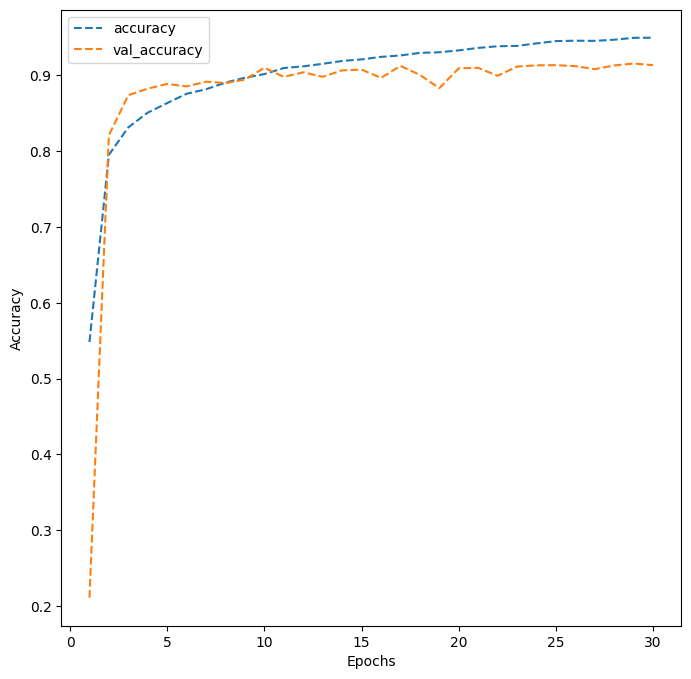

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**


1. The model learns the training data well, with high and slightly improving training accuracy (around 94.9%) and decreasing training loss.

2. Validation accuracy slightly decreased, and validation loss increased, indicating the model's performance on new data isn't improving.

3. High training accuracy and lower, deteriorating validation accuracy suggest the model is overfitting.

However this works better when compared to model 1

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred3 = cnn_model_2.predict(X_test)

test_pred3 = np.argmax(test_pred3, axis = -1)

563/563 [==============================] - 19s 33ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test3 = np.argmax(y_test_encoded, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



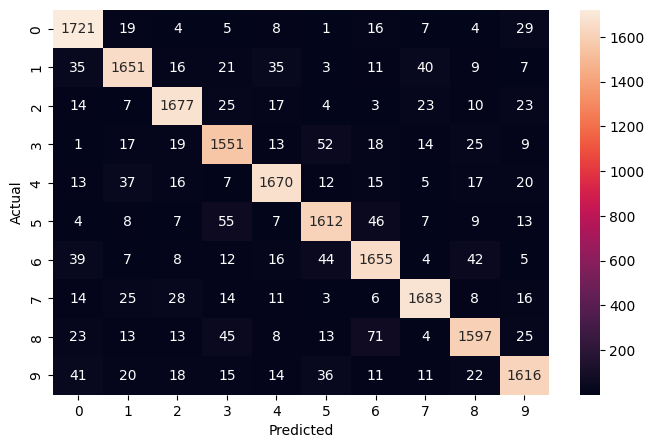

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test3, test_pred3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test3, test_pred3)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**

1. The model performs well overall, with an accuracy of 91%.
2. Performance across classes is consistent, with the best performance for classes 2 and 7.
3. Class 3 shows slightly lower performance, indicating potential areas for improvement.
4. The model maintains a good balance between precision and recall for all classes, indicating a reliable classification performance.

Comparision on the CNN Vs ANN final models

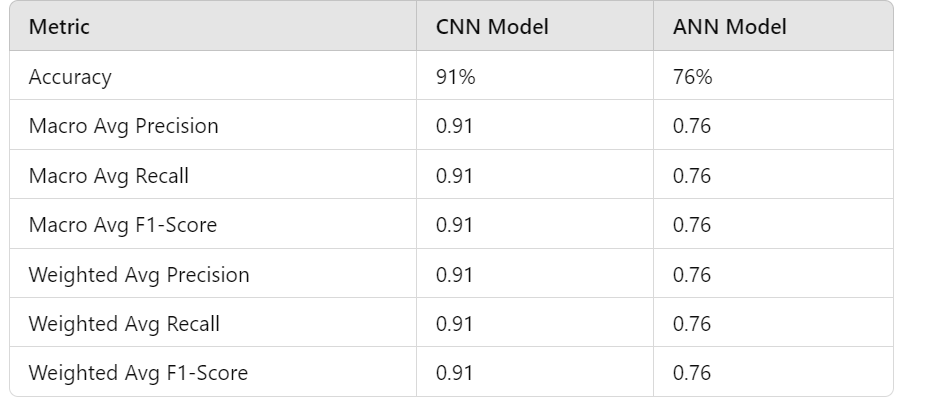

**Detailed Observations:**

**Accuracy:** The CNN model achieves a significantly higher accuracy of 91% compared to the ANN model's 76%.

**Macro Avg Precision, Recall, F1-Score:** The CNN model demonstrates consistent and higher macro average precision, recall, and F1-scores compared to the ANN model.

**Weighted Avg Precision, Recall, F1-Score:** Similarly, the CNN model shows higher weighted average precision, recall, and F1-scores compared to the ANN model.

**Summary:**

The comparison clearly illustrates the superiority of the CNN model over the ANN model in terms of accuracy and overall performance across all evaluation metrics. The CNN model's robustness and reliability make it the preferred choice for this classification task. Execution time of CNN is highly greater than ANN but the accuracy overweighs it.